In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 

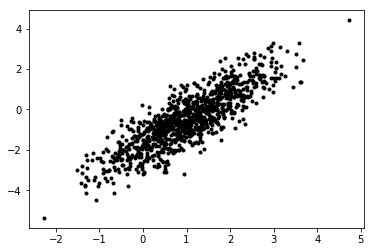

In [48]:
#def pdf(sample):
#    return np.exp(-(sample - nu)**2 / (2.* sigma**2)) / np.sqrt(2*np.pi*sigma**2)

mean = np.array([1., -0.5])
covariance_matrix = np.array([[1., 1.2,],[1.2, 2.]])
count = 1000
nu = np.array([1., 2.])

variance, rotation = np.linalg.eigh(covariance_matrix)

# losowanie z wielowymiarowego rozkładu gaussa 'ręcznie'
sample = mean + np.random.normal(scale=np.sqrt(variance), size=(count,2)) @ rotation.T

plt.plot(sample.T[0], sample.T[1], 'k.')
plt.xlabel("")
plt.ylabel("")
plt.show()

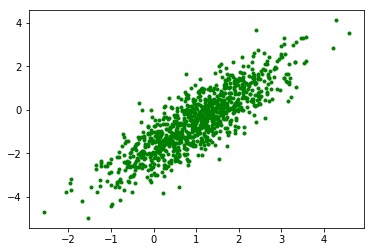

In [47]:
# losowanie gotową funkcją
sample2 = np.random.multivariate_normal(mean, covariance_matrix, size=count)
plt.plot(sample2[:,0], sample2[:,1], 'g.')
plt.xlabel("")
plt.ylabel("")
plt.show()

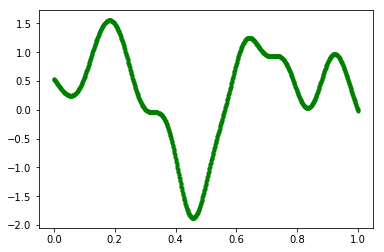

In [74]:
# 
count = 1000
alpha = 100.
mean = np.zeros(count)
abscissa = np.linspace(0., 1., count)
#covariance_matrix = np.min(abscissa[:, np.newaxis], abscissa[np.newaxis,:])
covariance = np.exp((-1) * alpha * (abscissa[:, np.newaxis] - abscissa[np.newaxis, :])**2)

variance, rotation = np.linalg.eigh(covariance_matrix)
sample = np.random.multivariate_normal(mean, covariance)

plt.plot(abscissa, sample, 'g.')
plt.xlabel("")
plt.ylabel("")
plt.show()

In [76]:
from scipy import stats

# new part - Estimators

sample = stats.expon(scale=0.6)



variance = np.var(sample, ddof=1) #ddof - delta degrees of freedeom  - norm. use ddof=1 -> poprawka na obiążenie
print("Variance", variance)

average = stats.tmean(sample) # korekcja na bias włączona automatycznie
print("Average", average)

dispersion = distribution.std()
print("Dispersion", dispersion)

variance = distribution.var()
print("Variance",variance)

average = np.sum(sample) / sample.size
variance = np.sum((sample - average)**2) / (sample.size - 1) / sample.size
dispersion = np.sqrt(variance)

# or
variance = distribution.std() / np.sqrt(sample.size)
dispersion = stats.tsem(sample)

# skośność = skewness = gamma3
skewness = distribution.stats(moments='s')
skewness = sample.size * np.sum((sample-average)**3) / dispersion**3 / (sample.size - 1) / (sample.size - 2)
skewness = stats.skew(sample, bias=False)

#kurtosis = gamma2
kurtosis = distribution.stats(moments='k')
kurtosis = sample.size * (sample.size + 1) * np.sum((sample - average)**4)

distribution 
expectations

In [88]:
# zagadnienie błędu błędu - Estymator 
step = 5.
pop = stats.uniform(loc=-step, scale=2.*step) # utożsamiamy z populacją stąd 'pop'
size = 100

average = pop.mean()
variance = pop.var() / size
#error = (pop.mom)

median = pop.median()

sample = pop.rvs(size)

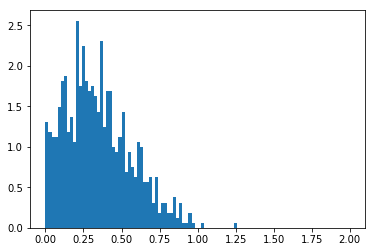

In [89]:
# zadanie z bootstrapem

#count = 1000
#expected = 1.
#dispersion = 2.
#sample = stats.norm.rvs(loc=expected, scale=dispersion, size=count)

reaverages = np.zeros(count)
revariances = np.zeros(count)
remedians = np.zeros(count)
for i in range(count):
    resample = sample[np.random.randint(sample.size, size=sample.size)]
    
    reaverage = resample.sum()
    reaverages[i] = resample.mean()
    revariances[i] = resample.var()
    remedians[i] = np.median(resample)
    
plt.hist(reaverages, density=True, range=(0., 2.), bins=100)
plt.show()

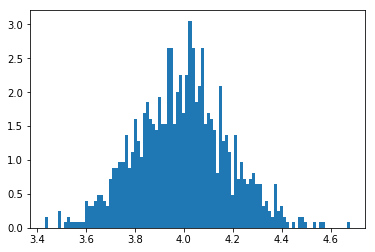

In [85]:
plt.hist(revariances, density=True, bins=100)
plt.show()

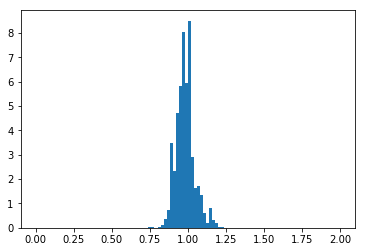

In [86]:
plt.hist(remedians, density=True, range=(0., 2.), bins=100)
plt.show()